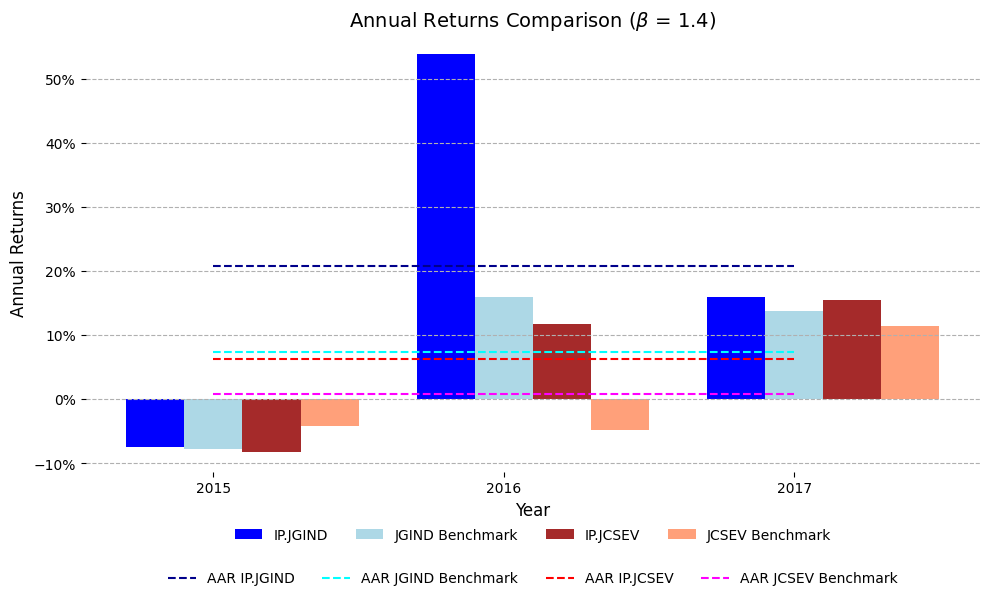

In [23]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

results_dir = "experiment_results/task_1"

# Get a list of all JSON files in the directory
#json_files = [f for f in os.listdir(results_dir) if f.endswith('.json')]

beta_value = 1.4
selected_file = f"invest_recommendation_beta_{beta_value}.json"


file_path = os.path.join(results_dir, selected_file)

with open(file_path, 'r') as f:
    results = json.load(f)


years = [2015, 2016, 2017]

# Extract the annual return data from the JSON
ip_jgind_returns = results["JGIND"]["annualReturns"]["IP.JGIND"]
benchmark_jgind_returns = results["JGIND"]["annualReturns"]["Benchmark.JGIND"]
ip_jcsev_returns = results["JCSEV"]["annualReturns"]["IP.JCSEV"]
benchmark_jcsev_returns = results["JCSEV"]["annualReturns"]["Benchmark.JCSEV"]

# --- Create the bar plot ---

bar_width = 0.2
plt.figure(figsize=(10, 6))

plt.bar(np.array(years) - bar_width, ip_jgind_returns, width=bar_width, label='IP.JGIND', color='blue')
plt.bar(years, benchmark_jgind_returns, width=bar_width, label='JGIND Benchmark', color='lightblue')
plt.bar(np.array(years) + bar_width, ip_jcsev_returns, width=bar_width, label='IP.JCSEV', color='brown')
plt.bar(np.array(years) + 2 * bar_width, benchmark_jcsev_returns, width=bar_width, label='JCSEV Benchmark',
        color='lightsalmon')

# --- Add lines for AAR ---

# Extract AAR data from your JSON
aar_ip_jgind = results["JGIND"]["performanceMetrics"]["IP.JGIND"]["AAR"]
aar_benchmark_jgind = results["JGIND"]["performanceMetrics"]["Benchmark.JGIND"]["AAR"]
aar_ip_jcsev = results["JCSEV"]["performanceMetrics"]["IP.JCSEV"]["AAR"]
aar_benchmark_jcsev = results["JCSEV"]["performanceMetrics"]["Benchmark.JCSEV"]["AAR"]

aar_ip_jgind_values = [aar_ip_jgind] * len(years)
aar_benchmark_jgind_values = [aar_benchmark_jgind] * len(years)
aar_ip_jcsev_values = [aar_ip_jcsev] * len(years)
aar_benchmark_jcsev_values = [aar_benchmark_jcsev] * len(years)

plt.plot(years, aar_ip_jgind_values, linestyle='--', color='darkblue', label='AAR IP.JGIND')
plt.plot(years, aar_benchmark_jgind_values, linestyle='--', color='cyan', label='AAR JGIND Benchmark')
plt.plot(years, aar_ip_jcsev_values, linestyle='--', color='red', label='AAR IP.JCSEV')
plt.plot(years, aar_benchmark_jcsev_values, linestyle='--', color='magenta', label='AAR JCSEV Benchmark')


plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Returns', fontsize=12)


plt.title(rf'Annual Returns Comparison ($\beta$ = {beta_value:.1f})', fontsize=14)

plt.xticks(years, fontsize=10)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# --- Explicit Legend Ordering ---

handles, labels = plt.gca().get_legend_handles_labels()

# Create separate lists for bar and line plot elements
bar_elements = []
line_elements = []

for handle, label in zip(handles, labels):
    if isinstance(handle, plt.matplotlib.lines.Line2D):  # Line plot element
        line_elements.append((handle, label))
    else:  # Bar plot element
        bar_elements.append((handle, label))

# Create two separate legends
first_legend = plt.legend([handle for handle, _ in bar_elements],
                          [label for _, label in bar_elements],
                          loc='upper center', 
                          bbox_to_anchor=(0.5, -0.10),
                          ncol=4, 
                          frameon=False)

# Add the first legend manually
plt.gca().add_artist(first_legend)

# Create the second legend with line plot labels
plt.legend([handle for handle, _ in line_elements],
           [label for _, label in line_elements],
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.20),
           ncol=4, 
           frameon=False)

plt.grid(axis='y', linestyle='--')

plt.subplots_adjust(bottom=0.25)

# --- Show the plot ---

plt.tight_layout()
plt.show()